# Proyek Analisis Data: [Brazilian E-Commerce Public Dataset by Olist
]
- **Nama:** [Greatly Hizkia Manua]
- **Email:** [greatlymanua@gmail.com]
- **ID Dicoding:** [greatly_manua_BLR4]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren jumlah order yang terkirim setiap bulan?
- Pertanyaan 2: Apa saja 5 Produk yang paling laris dan 5 Produk yang kurang diminati?

## Import Semua Packages/Library yang Digunakan

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [199]:
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
order_payment = pd.read_csv("data/olist_order_payments_dataset.csv")

# Merge table products dengan product_category_name_translation utk mendapatkan nama kategori dalam bahasa inggris
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
products = products.merge(product_category_name_translation, on = "product_category_name", how="left")

In [200]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [201]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [202]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [203]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [204]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [205]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

**menilai table** `order_items`

In [206]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [207]:
print("Total duplikat", order_items.duplicated().sum())

Total duplikat 0


melihat null value


In [208]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**menilai table** `order_reviews`

In [209]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


melihat null value dari table `order_reviews`

In [210]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [211]:
# Menghitung percentage null value
order_reviews.isna().sum() / len(order_reviews) * 100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

Mengecek duplikat value

In [212]:
print("jumlah duplikat value", order_reviews.duplicated().sum())

jumlah duplikat value 0


**Menilai table** `customers`

In [213]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [214]:
customers.duplicated().sum()

np.int64(0)

In [215]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**menilai table** `orders`

In [216]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [217]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [218]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [219]:
orders.duplicated().sum()

np.int64(0)

**menilai table** `products`

In [220]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [221]:
products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [222]:
# Cek persentase null value
products.isna().sum() / len(products) * 100

product_id                       0.000000
product_category_name            1.851234
product_name_lenght              1.851234
product_description_lenght       1.851234
product_photos_qty               1.851234
product_weight_g                 0.006070
product_length_cm                0.006070
product_height_cm                0.006070
product_width_cm                 0.006070
product_category_name_english    1.890686
dtype: float64

In [223]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Menilai table** `order_payment`

Table `order_payment` berisi kolom payment_value yang artinya itu pembayaran price + ongkir

In [224]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [225]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [226]:
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [227]:
order_payment.duplicated().sum()

np.int64(0)

In [228]:
order_payment.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### Cleaning Data

**Clean data** `order_reviews`

In [229]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [230]:
order_reviews.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Clean data** `Products`

In [231]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [232]:
# Drop kolom product_category_name karena sudah ada product_category_name_english
products.drop(columns=['product_category_name'], inplace=True)

In [233]:
products.isna().sum()

product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [234]:
products.dropna(inplace=True)
products.isna().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

**Clean data** `order_items`

In [235]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [236]:
# Ubah tipe data shipping_limit_date menjadi datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Clean data** `orders`

In [237]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [238]:
# Hapus null value
orders.dropna(inplace=True)

# Mengganti tipe data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime
columns_date = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
                
for col in columns_date:
    orders[col] = pd.to_datetime(orders[col])

orders.info()              

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Exploratory Data Analysis (EDA)

### Explore `products`

In [239]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32327 non-null  object 
 1   product_name_lenght            32327 non-null  float64
 2   product_description_lenght     32327 non-null  float64
 3   product_photos_qty             32327 non-null  float64
 4   product_weight_g               32327 non-null  float64
 5   product_length_cm              32327 non-null  float64
 6   product_height_cm              32327 non-null  float64
 7   product_width_cm               32327 non-null  float64
 8   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [240]:
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [241]:
products.describe(include="all")

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32327,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327
unique,32327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,48.473722,771.517277,2.188790,2276.960807,30.856498,16.955950,23.208464,NaN
std,NaN,10.246346,635.189674,1.736767,4279.734063,16.958460,13.637246,12.080665,NaN
min,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000,NaN


In [242]:
print("ada", products['product_category_name_english'].nunique(), "kategori produk yang berbeda")

ada 71 kategori produk yang berbeda


In [243]:
products["product_category_name_english"].value_counts()

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64

In [244]:
# Melihat korelasi
products[["product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].corr()

,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_photos_qty,1.000000,0.036548,0.067515,0.004021,0.026388
product_weight_g,0.036548,1.000000,0.476170,0.562669,0.526696
product_length_cm,0.067515,0.476170,1.000000,0.202175,0.541696
product_height_cm,0.004021,0.562669,0.202175,1.000000,0.311560
product_width_cm,0.026388,0.526696,0.541696,0.311560,1.000000


product_category_name_english
furniture_mattress_and_upholstery          13190.000000
office_furniture                           12740.867314
kitchen_dining_laundry_garden_furniture    11598.563830
furniture_bedroom                           9997.222222
home_appliances_2                           9913.333333
                                               ...     
tablets_printing_image                       381.444444
fashion_underwear_beach                      362.264151
fashion_sport                                344.736842
fashion_childrens_clothes                    324.000000
telephony                                    236.506173
Name: product_weight_g, Length: 71, dtype: float64


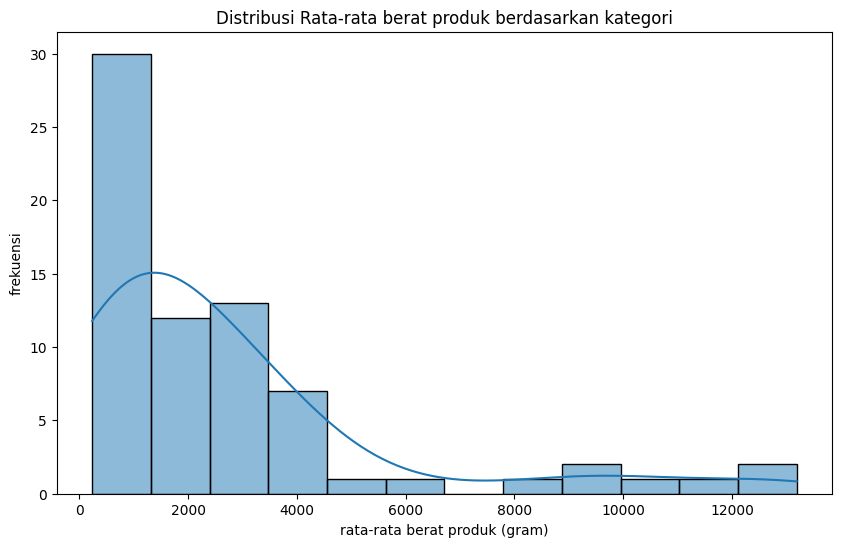

In [245]:
# Rata-rata berat product
product_weight = products.groupby(by="product_category_name_english")["product_weight_g"].mean().sort_values(ascending=False)

print(product_weight)

# Visualisasi Histogram untuk melihat distribusi rata-rata berat produk 
plt.figure(figsize=(10,6))
sns.histplot(product_weight, kde=True)
plt.title("Distribusi Rata-rata berat produk berdasarkan kategori")
plt.xlabel("rata-rata berat produk (gram)")
plt.ylabel("frekuensi")
plt.show()

dari histogram dapat dilihat bahwa data berat produk paling banyak adalah 100g - 1000g

### Explore `order_items` merge `products`

In [246]:
# Merge table "order_items" dengan "products" berdasarkan product_id
product_order_items = pd.merge(products, order_items, on="product_id", how="left")
product_order_items.head()


,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [247]:
# Melihat korelasi harga produk dengan "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
corr_price = product_order_items[["price", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].corr()
print(corr_price["price"].sort_values(ascending=False))

price                 1.000000
product_weight_g      0.339907
product_height_cm     0.223803
product_width_cm      0.172354
product_length_cm     0.146092
product_photos_qty    0.051606
Name: price, dtype: float64


harga tidak dipengaruhi dengan kuat oleh "product_weight_g", "product_height_cm", "product_width_cm", "product_length_cm", "product_photos_qty".

In [248]:
corr_ongkir = product_order_items[["freight_value", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].corr()
print(corr_ongkir["freight_value"].sort_values(ascending=False))

freight_value         1.000000
product_weight_g      0.611332
product_height_cm     0.391779
product_width_cm      0.322807
product_length_cm     0.308072
product_photos_qty    0.022208
Name: freight_value, dtype: float64


ongkir bisa dikatakan dipengaruhi oleh berat product meskipun hanya berkorelasi positif lemah.

In [249]:
product_order_items.describe(include="all")

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,111022,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022,111022,111022.000000,111022,111022,111022.000000,111022.000000
unique,32327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,97255,NaN,3033,NaN,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115,21,NaN,2033,NaN,NaN,NaN
mean,NaN,48.774432,787.870854,2.209562,2099.897507,30.212210,16.624966,23.042172,NaN,NaN,1.198231,NaN,2018-01-08 09:31:21.284997632,120.738772,20.025485
min,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,NaN,1.000000,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,NaN,1.000000,NaN,2017-09-21 04:30:36.750000128,39.900000,13.080000
50%,NaN,52.000000,602.500000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,NaN,1.000000,NaN,2018-01-28 22:55:38,74.990000,16.310000
75%,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,NaN,1.000000,NaN,2018-05-10 22:55:17.750000128,134.900000,21.180000
max,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN,NaN,21.000000,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Dari hasil diatas dapat dilihat produk paling murah berharga 0.85 REAL dan produk paling mahal berharga 6735 REAL, rata-rata harga produk 120 REAL.

Dapat dilihat juga ongkir paling mahal adalah 409.68 REAL dan rata-rata ongkir 20.03 REAL dan juga ada kategori produk yang 0 ongkir, mungkin ini gratis ongkir.

In [250]:
# Melihat produk dengan harga termahal
produk_termahal = product_order_items[product_order_items["price"] == product_order_items["price"].max()]
print(produk_termahal[["product_id", "product_category_name_english", "product_weight_g","price", "freight_value"]])

                             product_id product_category_name_english  \
20252  489ae2aa008f021502940f251d4cce7f                    housewares   

       product_weight_g   price  freight_value  
20252           30000.0  6735.0         194.31  


housewares dengan berat 30kg dan ongkir 194.31 REAL menjadi product harga termahal 6735 REAL.

In [251]:
product_order_items[["product_category_name_english", "price"]].sort_values(by="price", ascending=False).head(10)

,product_category_name_english,price
20252,housewares,6735.00
72926,computers,6729.00
48829,art,6499.00
70847,small_appliances,4799.00
31816,small_appliances,4690.00
83437,computers,4590.00
104886,musical_instruments,4399.87
103346,consoles_games,4099.99
45393,sports_leisure,4059.00
39449,watches_gifts,3999.90


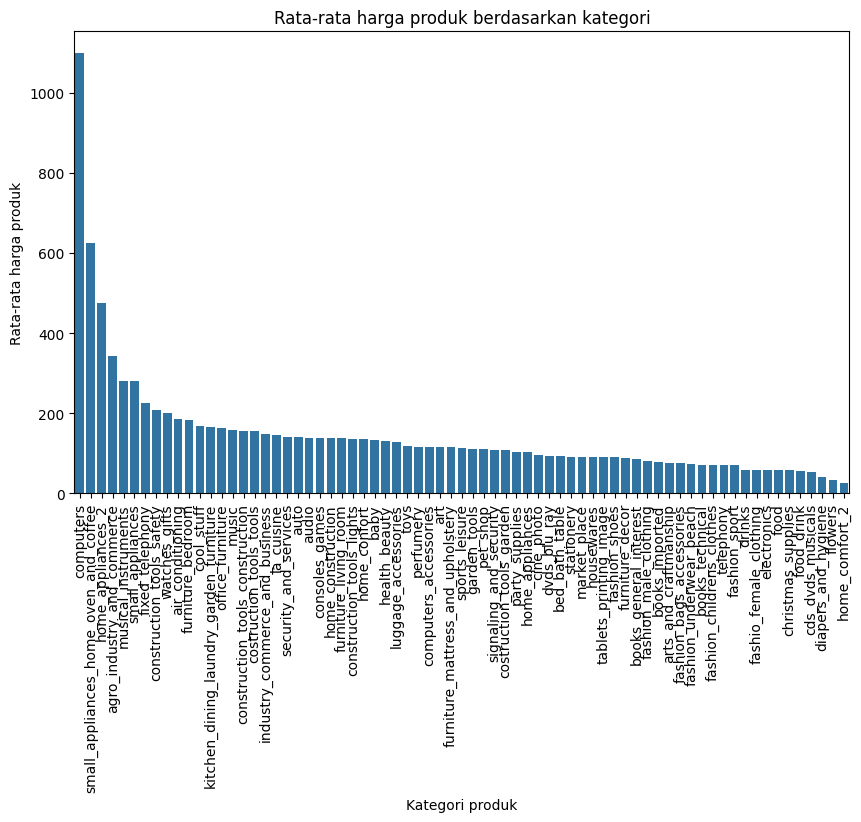

In [252]:
# Visualisasi rata-rata harga produk berdasarkan kategori
plt.figure(figsize=(10,6))
sns.barplot(x=product_order_items.groupby(by = "product_category_name_english")["price"].mean().sort_values(ascending=False).index, 
            y=product_order_items.groupby(by = "product_category_name_english")["price"].mean().sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title("Rata-rata harga produk berdasarkan kategori")
plt.xlabel("Kategori produk")
plt.ylabel("Rata-rata harga produk")
plt.show()

kategori produk computers memiliki rata-rata harga paling tinggi 

### Explore gabungan `order_reviews` merge `order_items` dan `products`


In [253]:
review_products = order_items.merge(order_reviews, on="order_id")\
                            .merge(products, on="product_id")
review_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,2018-08-15 00:00:00,2018-08-15 16:39:01,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,2017-03-02 00:00:00,2017-03-03 10:54:59,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [254]:
review_products.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,110749,110749.000000,110749,110749,110749,110749.000000,110749.000000,110749,110749.000000,110749,110749,110749.000000,110749.000000,110749.000000,110749.000000,110749.000000,110749.000000,110749.000000,110749
unique,96516,NaN,32170,3028,NaN,NaN,NaN,96319,NaN,633,96163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,5a3b1c29a49756e75f1ef513383c0c12,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,NaN,2018-05-15 00:00:00,2017-07-30 14:19:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,22,NaN,524,2020,NaN,NaN,NaN,21,NaN,506,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11137
mean,NaN,1.196399,NaN,NaN,2018-01-08 04:26:02.922274816,120.459316,20.012449,NaN,4.035386,NaN,NaN,48.776034,786.797524,2.206973,2096.696097,30.210377,16.607744,23.046709,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,1.000000,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-21 02:10:27,39.900000,13.080000,NaN,4.000000,NaN,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 19:14:35,74.900000,16.290000,NaN,5.000000,NaN,NaN,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 20:30:24,134.900000,21.170000,NaN,5.000000,NaN,NaN,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,5.000000,NaN,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN


In [255]:
# Melihat berapa banyak orang yang memberikan review skor (1-5)
print("--- Orang yang memberikan review skor (1-5)")
print(review_products["review_score"].value_counts().sort_index(ascending=False))

# Melihat berapa persentase orang yang memberikan review skor (1-5)

print("--- Persentase orang yang memberikan review skor (%)")
print(review_products["review_score"].value_counts(normalize=True).sort_index(ascending=False) * 100)

--- Orang yang memberikan review skor (1-5)
review_score
5    62673
4    21009
3     9319
2     3809
1    13939
Name: count, dtype: int64
--- Persentase orang yang memberikan review skor (%)
review_score
5    56.590127
4    18.969923
3     8.414523
2     3.439309
1    12.586118
Name: proportion, dtype: float64


Berdasarkan hasil diatas dapat dilihat bahwa persentase customer yang memberikan review skor (1) sebanyak 12.59%. Hal ini harus dievaluasi oleh Olist dengan melihat yang apa penyebab customer memberikan skor 1 pada review produk.

product_category_name_english
bed_bath_table               11137
health_beauty                 9645
sports_leisure                8640
furniture_decor               8331
computers_accessories         7849
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      13
fashion_childrens_clothes        8
security_and_services            2
Name: review_score, Length: 71, dtype: int64


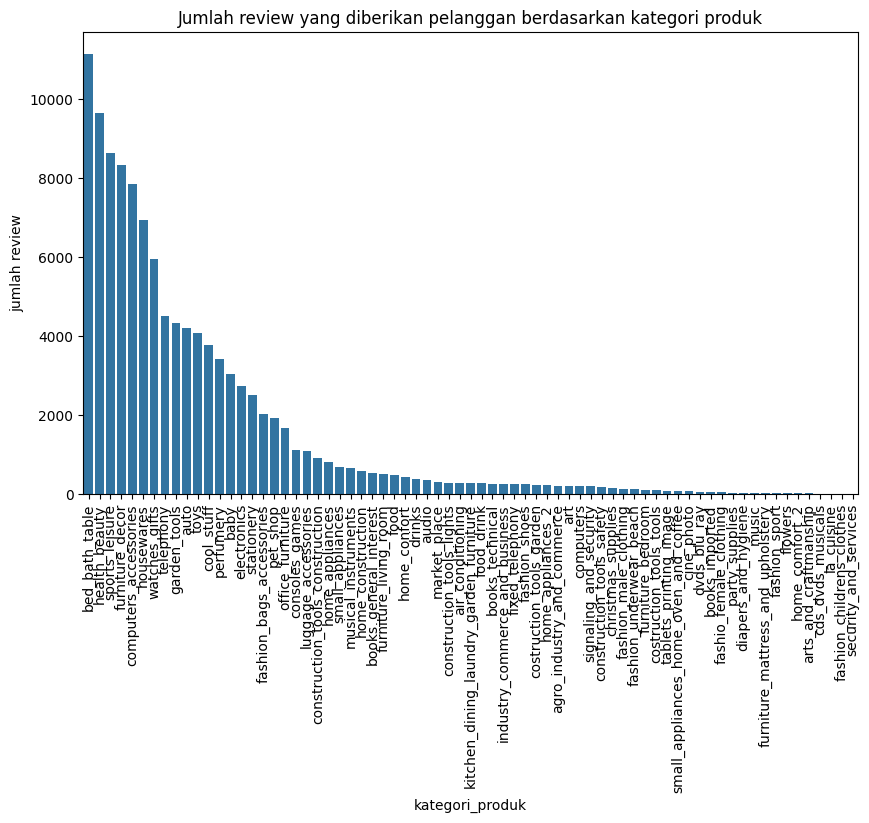

In [256]:
# Melihat jumlahh review yang diberikan pelanggan berdasarkan kategori produk
product_review_count = review_products.groupby(by="product_category_name_english")["review_score"].count().sort_values(ascending=False)
print(product_review_count)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=product_review_count.index, y=product_review_count.values)
plt.xticks(rotation=90)
plt.title("Jumlah review yang diberikan pelanggan berdasarkan kategori produk")
plt.xlabel("kategori_produk")
plt.ylabel("jumlah review")
plt.show()

                                   mean  count
product_category_name_english                 
bed_bath_table                 3.895663  11137
health_beauty                  4.142768   9645
sports_leisure                 4.107986   8640
furniture_decor                3.903493   8331
computers_accessories          3.930819   7849


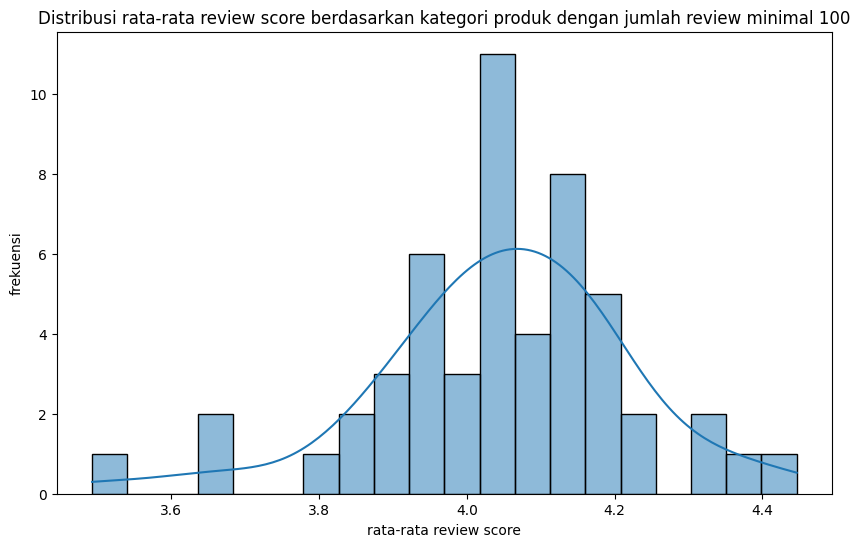

In [257]:
# Melihat rata-rata review score yang diberikan pelanggan berdasarkan kategori produk
# Dengan memfilter kategori produk yang memiliki jumlah review minimal 100

stats_review = review_products.groupby(by="product_category_name_english")["review_score"].agg(["mean", "count"])

print(stats_review[stats_review["count"] >= 100].sort_values(by="count", ascending=False).head())

plt.figure(figsize=(10,6))
sns.histplot(stats_review[stats_review["count"] >= 100]["mean"], bins=20, kde=True)
plt.title("Distribusi rata-rata review score berdasarkan kategori produk dengan jumlah review minimal 100")
plt.xlabel("rata-rata review score")
plt.ylabel("frekuensi")
plt.show()


### Explore `Orders`

In [258]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [259]:
orders["order_status"].value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [260]:
print("Data order mulai dari tanggal", orders['order_purchase_timestamp'].min(), "-", orders['order_purchase_timestamp'].max())

Data order mulai dari tanggal 2016-09-15 12:16:38 - 2018-08-29 15:00:37


In [261]:
# Buat kolom baru untuk menyimpan informasi jam pembelian
orders['purchase_hour'] = orders['order_purchase_timestamp'].dt.hour
print(orders[['purchase_hour', 'order_purchase_timestamp']].head())

   purchase_hour order_purchase_timestamp
0             10      2017-10-02 10:56:33
1             20      2018-07-24 20:41:37
2              8      2018-08-08 08:38:49
3             19      2017-11-18 19:28:06
4             21      2018-02-13 21:18:39


In [262]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21


In [263]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   purchase_hour                  96461 non-null  int32         
dtypes: datetime64[ns](5), int32(1), object(3)
memory usage: 7.0+ MB


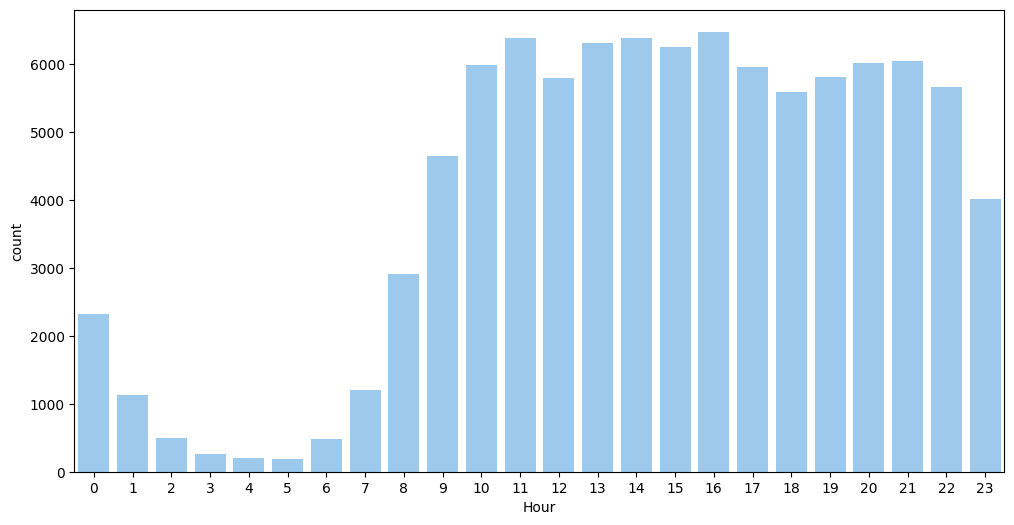

In [264]:
# Visualisasi jumlah order berdasarkan jam pembelian
hourly_counts = orders['purchase_hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'count']

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=hourly_counts, color="#90CAF9", ax=ax)
plt.xlabel("Hour")
plt.ylabel("count")
plt.show()

In [265]:
# Buat kolom baru untuk menyimpan informasi waktu pengiriman
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
print(orders[['order_delivered_customer_date', 'order_purchase_timestamp', 'delivery_time']].head())

  order_delivered_customer_date order_purchase_timestamp  delivery_time
0           2017-10-10 21:25:13      2017-10-02 10:56:33              8
1           2018-08-07 15:27:45      2018-07-24 20:41:37             13
2           2018-08-17 18:06:29      2018-08-08 08:38:49              9
3           2017-12-02 00:28:42      2017-11-18 19:28:06             13
4           2018-02-16 18:17:02      2018-02-13 21:18:39              2


In [266]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_hour,delivery_time
count,96461,96461,96461,96461,96461,96461.000000,96461.000000
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,14.773173,12.093582
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000,0.000000
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,11.000000,6.000000
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,15.000000,10.000000
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,19.000000,15.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,23.000000,209.000000
std,NaN,NaN,NaN,NaN,NaN,5.328512,9.551576


dari hasil diatas kita bisa melihat bahwa rata-rata delivery time 12 hari, max delivery time 209 hari, namun ada juga barang yang dikirim  dihari yang sama ketika dipesan.

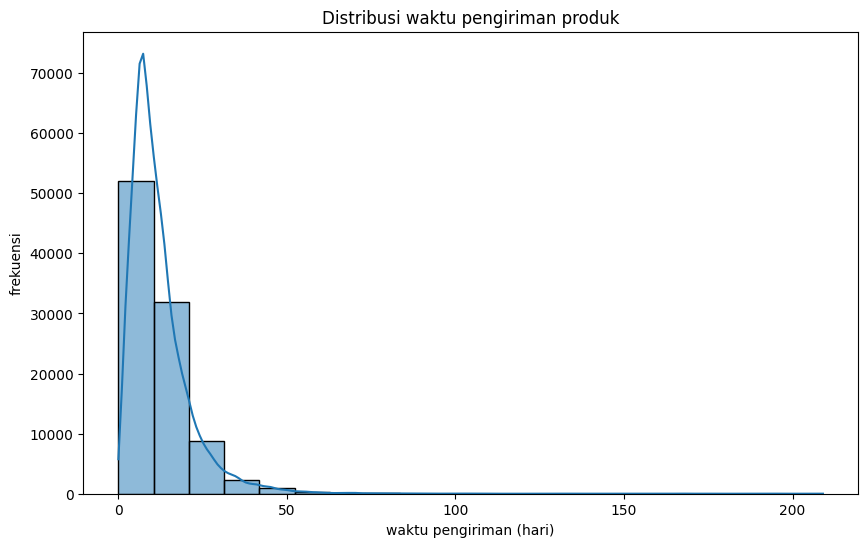

In [267]:
# Visualisasi distribusi waktu pengiriman produk
plt.figure(figsize=(10,6))
sns.histplot(orders['delivery_time'], bins=20, kde=True)
plt.title("Distribusi waktu pengiriman produk")
plt.xlabel("waktu pengiriman (hari)")
plt.ylabel("frekuensi")
plt.show()

kebanyakan pesanan dikirim 0 - 20 hari setelah dipesan oleh customer

In [268]:
late_delivery = orders[orders["delivery_time"] > 50]
print("jumlah order dengan waktu pengiriman lebih dari 50 hari:", len(late_delivery))

jumlah order dengan waktu pengiriman lebih dari 50 hari: 610


In [269]:
# Merge orders, order_items, dan products untuk melihat produk apa saja yang memiliki waktu kirim lebih dari 50 hari
late_delivery_products = late_delivery.merge(order_items, on="order_id").merge(products, on="product_id")

print(late_delivery_products['product_category_name_english'].value_counts())


product_category_name_english
bed_bath_table                       78
health_beauty                        64
furniture_decor                      55
sports_leisure                       50
computers_accessories                48
auto                                 40
office_furniture                     39
housewares                           30
watches_gifts                        28
toys                                 26
garden_tools                         22
perfumery                            21
stationery                           21
cool_stuff                           21
baby                                 20
telephony                            15
electronics                          13
consoles_games                        9
fashion_bags_accessories              9
construction_tools_construction       9
food                                  5
pet_shop                              3
computers                             3
small_appliances                      3
musical_in

Diatas adalah kategori produk yang sampai ke customer > 50 hari setelah dipesan.

Cth kategori produk `bed_bath_table` tiba > 50 hari sbyk 78 kali

### Explore gabungan `products`, `order_items`, `orders`


In [270]:
# Merge products dengan order_items dan juga orders
product_order_items_orders = products.merge(order_items, 
                                            on="product_id", 
                                            how ="left")
product_order_items_orders = product_order_items_orders.merge(orders, on="order_id", how="left")

# Buat kolom baru format 'YYYY-MM'
product_order_items_orders['month_year'] = product_order_items_orders['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah penjualan tiap produk per bulan
monthly_sales = product_order_items_orders.groupby(['month_year', 'product_category_name_english']).size().reset_index(name='total_sales')

# Urutkan dari yang paling laku (total_sales terbesar)
monthly_sales_sorted = monthly_sales.sort_values(['month_year', 'total_sales'], ascending=[True, False])

# Ambil 1 produk teratas (Juara 1) untuk setiap bulan
produk_paling_laku = monthly_sales_sorted.groupby('month_year').head(1)

print(produk_paling_laku)                                                      



     month_year product_category_name_english  total_sales
0       2016-09                 health_beauty            3
17      2016-10               furniture_decor           65
30      2016-12      fashion_bags_accessories            1
51      2017-01               furniture_decor          176
98      2017-02               furniture_decor          255
147     2017-03               furniture_decor          315
179     2017-04                bed_bath_table          271
237     2017-05                bed_bath_table          361
294     2017-06                bed_bath_table          369
354     2017-07                bed_bath_table          569
414     2017-08                bed_bath_table          506
476     2017-09                bed_bath_table          528
541     2017-10                bed_bath_table          542
604     2017-11                bed_bath_table          961
669     2017-12                bed_bath_table          546
731     2018-01                bed_bath_table          8

Hasil diatas adalah produk yang paling banyak laku di setiap bulan.

Contoh 2016-09 produk yang sering laku dibulan itu adalah 'healthy beauty' dengan total sales 3

Selanjutnya saya ingin melihat berapa percent produk `bed_bath_table` menghasilkan revenue dibandingkan dari semua produk

In [271]:
# 1. Hitung TOTAL REVENUE SELURUH TOKO (Semua produk, semua waktu)
total_revenue_toko = product_order_items_orders['price'].sum()

# 2. Hitung total revenue `bed_bath_table`
nama_produk = 'bed_bath_table'
revenue_produk_ini = product_order_items_orders[product_order_items_orders['product_category_name_english'] == nama_produk]['price'].sum()

# 3. Hitung Persentase Kontribusinya
persentase_kontribusi = (revenue_produk_ini / total_revenue_toko) * 100

print(f"Total Revenue Toko: {total_revenue_toko:,.2f}")
print(f"Total Revenue {nama_produk}: {revenue_produk_ini:,.2f}")
print(f"Persentase Kontribusi: {persentase_kontribusi:.2f}%")

Total Revenue Toko: 13,404,659.94
Total Revenue bed_bath_table: 1,036,988.68
Persentase Kontribusi: 7.74%


Selanjutnya melihat 10 kategori produk penyumbang revenue terbesar

In [272]:
# 1. Hitung total revenue per kategori
revenue_per_kategori = product_order_items_orders.groupby('product_category_name_english')['price'].sum().reset_index()

# 2. Hitung persentase untuk setiap kategori
revenue_per_kategori['persentase'] = (revenue_per_kategori['price'] / total_revenue_toko) * 100

# 3. Urutkan dari yang terbesar (Top 10 Penyumbang Revenue)
top_penyumbang = revenue_per_kategori.sort_values(by='persentase', ascending=False).head(10)
top_penyumbang.columns = ["product_category", "revenue", "persentase"]
print(top_penyumbang)


         product_category     revenue  persentase
43          health_beauty  1258681.34    9.389879
70          watches_gifts  1205005.68    8.989454
7          bed_bath_table  1036988.68    7.736031
65         sports_leisure   988048.97    7.370936
15  computers_accessories   911954.32    6.803263
39        furniture_decor   729762.49    5.444096
20             cool_stuff   635290.85    4.739328
49             housewares   632248.66    4.716633
5                    auto   592720.11    4.421747
42           garden_tools   485256.46    3.620058


Dilanjutkan dengan visualisasi

C:\Users\great\AppData\Local\Temp\ipykernel_18192\1068880237.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


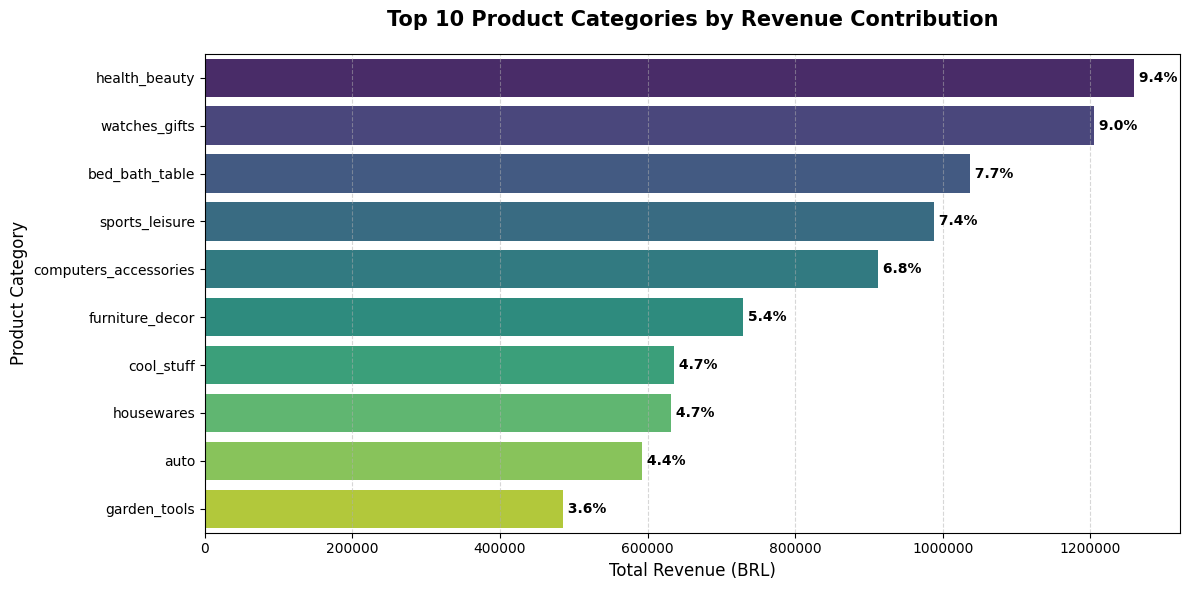

In [273]:
# Menyiapkan frame grafik
plt.figure(figsize=(12, 6))

# Membuat Bar Chart
# Warna biru gradasi agar fokus pada kategori teratas

ax = sns.barplot(
    data=top_penyumbang, 
    x='revenue', 
    y='product_category', 
    palette="viridis"
)

# Menambahkan label persentase di setiap batang
for i, (value, percent) in enumerate(zip(top_penyumbang['revenue'], top_penyumbang['persentase'])):
    ax.text(value, i, f' {percent:.1f}%', va='center', fontsize=10, weight='bold')

# Merapikan angka ribuan agar mudah dibaca
plt.ticklabel_format(style='plain', axis='x')
plt.title('Top 10 Product Categories by Revenue Contribution', fontsize=15, pad=20, weight='bold')
plt.xlabel('Total Revenue (BRL)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Kategori Health beauty menyumbangkan revenue terbanyak deengan `1258681.34 BRL`, atau dengan kata lain  
`9.389879%` dari seluruh revenue toko

### Explore `customers`

In [274]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [275]:
# Melihat dari kota2 mana saja pelanggan berasal
customers["customer_city"].value_counts()

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

Customers paling banyak berasal dari sao paulo

In [276]:
# Melihat dari kota2 mana saja pelanggan berasal
# Merge customers dengan orders

customers_orders = customers.merge(orders, on="customer_id", how="left")

customers_orders.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_hour,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,15.0,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,20.0,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,16.0,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,16.0,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,9.0,11.0


### Explore `order_payment`

In [277]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [278]:
order_payment.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Dari hasil diatas dapat dilihat bahwa rata-rata pembayaran adalah 154.100380, maksimal pembayaran 13664.080000.

Dapat dilihat juga customer membayar menggunakan cicilan paling banyak 24x. 


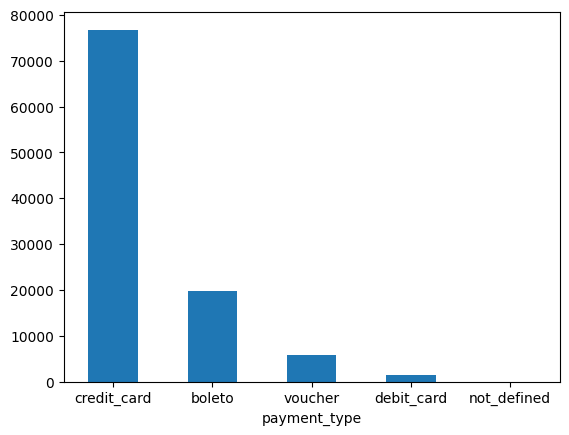

In [279]:
# Visualisasi tipe pembayaran apa yang sering dipakai customer
order_payment["payment_type"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0)
plt.show()

Customers paling banyak melakukan pembayaran menggunakan credit card

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah order yang terkirim setiap bulan?

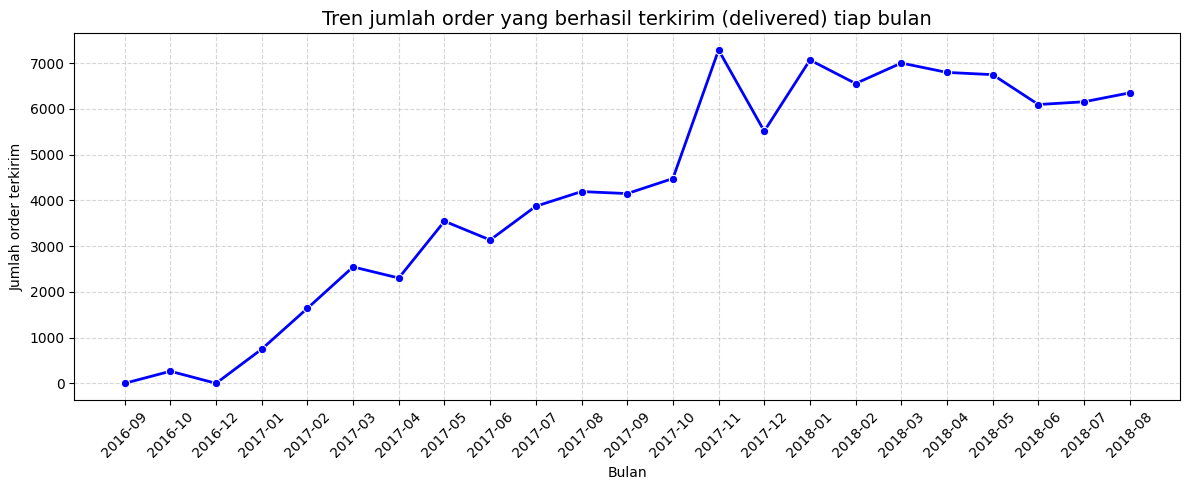

In [280]:
# Filter hanya ambil order yang statusnya 'delivered'
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()

# Hitung jumlah order unik per bulan
monthly_orders = delivered_orders.groupby(delivered_orders['order_purchase_timestamp'].dt.to_period('M'))['order_id'].nunique().reset_index()
monthly_orders.columns = ['month_year', 'total_orders_delivered']

# Ubah month_year ke string untuk visualisasi
monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)

# Membuat line chart untuk melihat tren jumlah order per bulan
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_orders, x='month_year', y='total_orders_delivered', marker='o', color='blue', linewidth=2)

plt.title("Tren jumlah order yang berhasil terkirim (delivered) tiap bulan", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Jumlah order terkirim")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Apa saja 5 Produk yang paling laris dan 5 Produk yang kurang diminati?

In [281]:
# Menghitung total penjualan per kategori produk
product_sales_count = product_order_items_orders['product_category_name_english'].value_counts().reset_index()
product_sales_count.columns = ['product_category', 'total_sold']

In [282]:
# Mencari Top 5 produk terlaris
top_5_products = product_sales_count.head(5)
print("--- 5 Kategori produk paling laris ---")
print(top_5_products)

--- 5 Kategori produk paling laris ---
        product_category  total_sold
0         bed_bath_table       11115
1          health_beauty        9670
2         sports_leisure        8641
3        furniture_decor        8334
4  computers_accessories        7827


In [283]:
# Mencari 5 produk kurang diminati
bottom_5_products = product_sales_count.tail(5).sort_values(by='total_sold', ascending=True)

print("--- 5 Kategori produk kurang diminati ---")
print(bottom_5_products)

--- 5 Kategori produk kurang diminati ---
             product_category  total_sold
70      security_and_services           2
69  fashion_childrens_clothes           8
68          cds_dvds_musicals          14
67                 la_cuisine          14
66      arts_and_craftmanship          24


C:\Users\great\AppData\Local\Temp\ipykernel_18192\1448143621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sold", y="product_category", data=top_5_products, palette="Blues_d", ax=ax[0])
C:\Users\great\AppData\Local\Temp\ipykernel_18192\1448143621.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sold", y="product_category", data=bottom_5_products, palette="Reds_d", ax=ax[1])


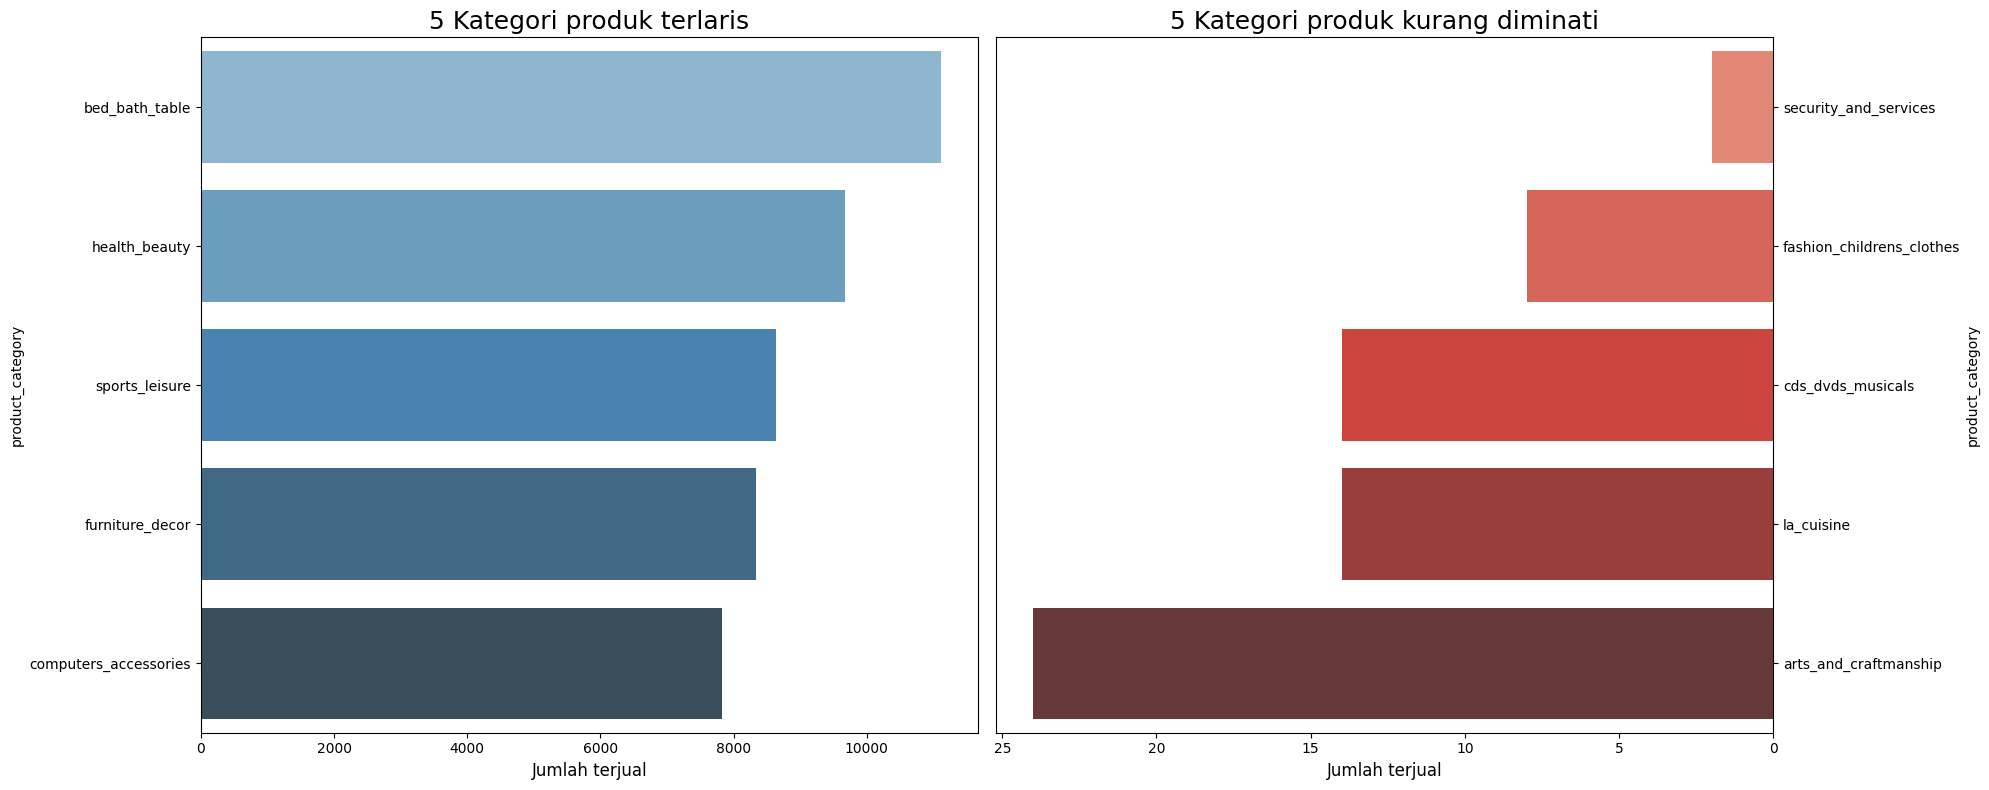

In [284]:
# Visualisasi berdampingan untuk keduanya
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(20,8))

# Visualisasi 5 Produk terlaris
sns.barplot(x="total_sold", y="product_category", data=top_5_products, palette="Blues_d", ax=ax[0])
ax[0].set_title("5 Kategori produk terlaris", fontsize=18)
ax[0].set_xlabel("Jumlah terjual", fontsize=12)

# Visualisasi 5 Produk kurang diminati
sns.barplot(x="total_sold", y="product_category", data=bottom_5_products, palette="Reds_d", ax=ax[1])
ax[1].set_title("5 Kategori produk kurang diminati", fontsize = 18)
ax[1].set_xlabel("Jumlah terjual", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional) RFM ANALYSIS

Prepare the data for RFM Analysis

In [285]:
# Menjumlahkan semua price per order_id
price_summary = order_items.groupby("order_id")["price"].sum().reset_index()

# Orders merge dengan price_summary yang didalamnya ada (order_items)
orders_price = orders.merge(price_summary, on='order_id', how="left")


# Merge lagi dengan tabel customers untuk dipakai RFM ANALYSIS
rfm_raw_data = orders_price.merge(customers, on='customer_id', how="left")
rfm_raw_data.head()

rfm_raw_data.to_csv('rfm_raw_data.csv', index=False)

In [286]:
monetary = rfm_raw_data.groupby(by="customer_unique_id", as_index = False).agg({
    "price" : "sum"
})

monetary.columns = ["customer_unique_id", "monetary"]

monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [287]:
rfm_raw_data['order_purchase_timestamp'] = pd.to_datetime(rfm_raw_data['order_purchase_timestamp'])

# Menentukan tanggal biasanya tanggal terakhir ada transaksi di dataset + 1 hari
rfm_df_date = rfm_raw_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [288]:
# Menghitung R, F dan M
rfm_df = rfm_raw_data.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp" : lambda x: (rfm_df_date - x.max()).days, # Recency (selisih hari)
    "order_id": "nunique",                                               # Frequency (jumlah order unik)
    "price": "sum"                                                        # Monetary (total uang)
})



rfm_df.to_csv('rfm_df.csv', index =False)
rfm_df.head()

,customer_unique_id,order_purchase_timestamp,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [289]:
rfm_df.columns = ["customer_id", "recency", "frequency", "monetary"]

In [290]:
rfm_df.describe()

,recency,frequency,monetary
count,93342.000000,93342.000000,93342.000000
mean,237.927632,1.033415,141.619482
std,152.584210,0.209091,215.708238
min,1.000000,1.000000,0.850000
25%,114.000000,1.000000,47.650000
50%,219.000000,1.000000,89.700000
75%,346.000000,1.000000,154.690000
max,714.000000,15.000000,13440.000000


In [291]:
rfm_df.sort_values(by="recency", ascending = True).head(10)

,customer_id,recency,frequency,monetary
13430,24ac2b4327e25baf39f2119e4228976a,1,1,84.99
61032,a712a430955027da5bc257a10073a390,1,1,149.90
5981,1041688b50cfd8ef6df6086a1746a30c,1,2,41.80
66038,b4dcade04bc548b7e3b0243c801f8c26,1,1,99.00
13155,23e6a9d387ba03e2099233222d7635cf,1,1,169.00
39920,6d2ca69d13c11fd702133bfc8a1310a3,1,1,99.90
43527,77367b6fbb034ca710d4f41aad009151,1,1,59.90
32554,58ffbb506c34ffb731c99595589a4ebe,1,1,30.00
57659,9dfcc502727549f99c9f73dbd28b35e9,1,1,79.98
46733,7febafa06d9d8f232a900a2937f04338,1,1,45.90


In [292]:
rfm_df.sort_values(by="frequency", ascending = False).head(10)

,customer_id,recency,frequency,monetary
51424,8d50f5eadf50201ccdcedfb9e2ac8455,9,15,714.63
22775,3e43e6105506432c953e165fb2acf44c,183,9,1000.85
73909,ca77025e7201e3b30c44b472ff346268,90,7,806.61
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,197,7,809.21
36702,6469f99c1f9dfae7733b25662e7f1782,63,7,664.20
80524,dc813062e0fc23409cd255f7f53c7074,7,6,687.76
26253,47c1a3033b8b77b3ab6e109eb4d5fdf3,217,6,836.60
87869,f0e310a6839dce9de1638e0fe5ab282a,147,6,438.09
6964,12f5d6e1cbf93dafd9dcc19095df0b3d,601,6,58.40
36496,63cfc61cee11cbe306bff5857d00bfe4,93,6,579.81


In [293]:
rfm_df.sort_values(by="monetary", ascending = False).head(10)

,customer_id,recency,frequency,monetary
3724,0a0a92112bd4c708ca5fde585afaa872,334,1,13440.0
79622,da122df9eeddfedc1dc1f5349a1a690c,515,2,7388.0
43164,763c8b1c9c68a0229c42c9fc6f662b93,46,1,7160.0
80449,dc4802a71eae9be1dd28f5d788ceb526,563,1,6735.0
25432,459bef486812aa25204be022145caa62,35,1,6729.0
93065,ff4159b92c40ebe40454e3e6a7c35ed6,462,1,6499.0
23407,4007669dec559734d6f53e029e360987,279,1,5934.6
87132,eebb5dda148d3893cdaf5b5ca3040ccb,498,1,4690.0
26636,48e1ac109decbb87765a3eade6854098,69,1,4590.0
59155,a229eba70ec1c2abef51f04987deb7a5,90,1,4400.0


C:\Users\great\AppData\Local\Temp\ipykernel_18192\786782806.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\great\AppData\Local\Temp\ipykernel_18192\786782806.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\great\AppData\Local\Temp\ipykernel_18192\786782806.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


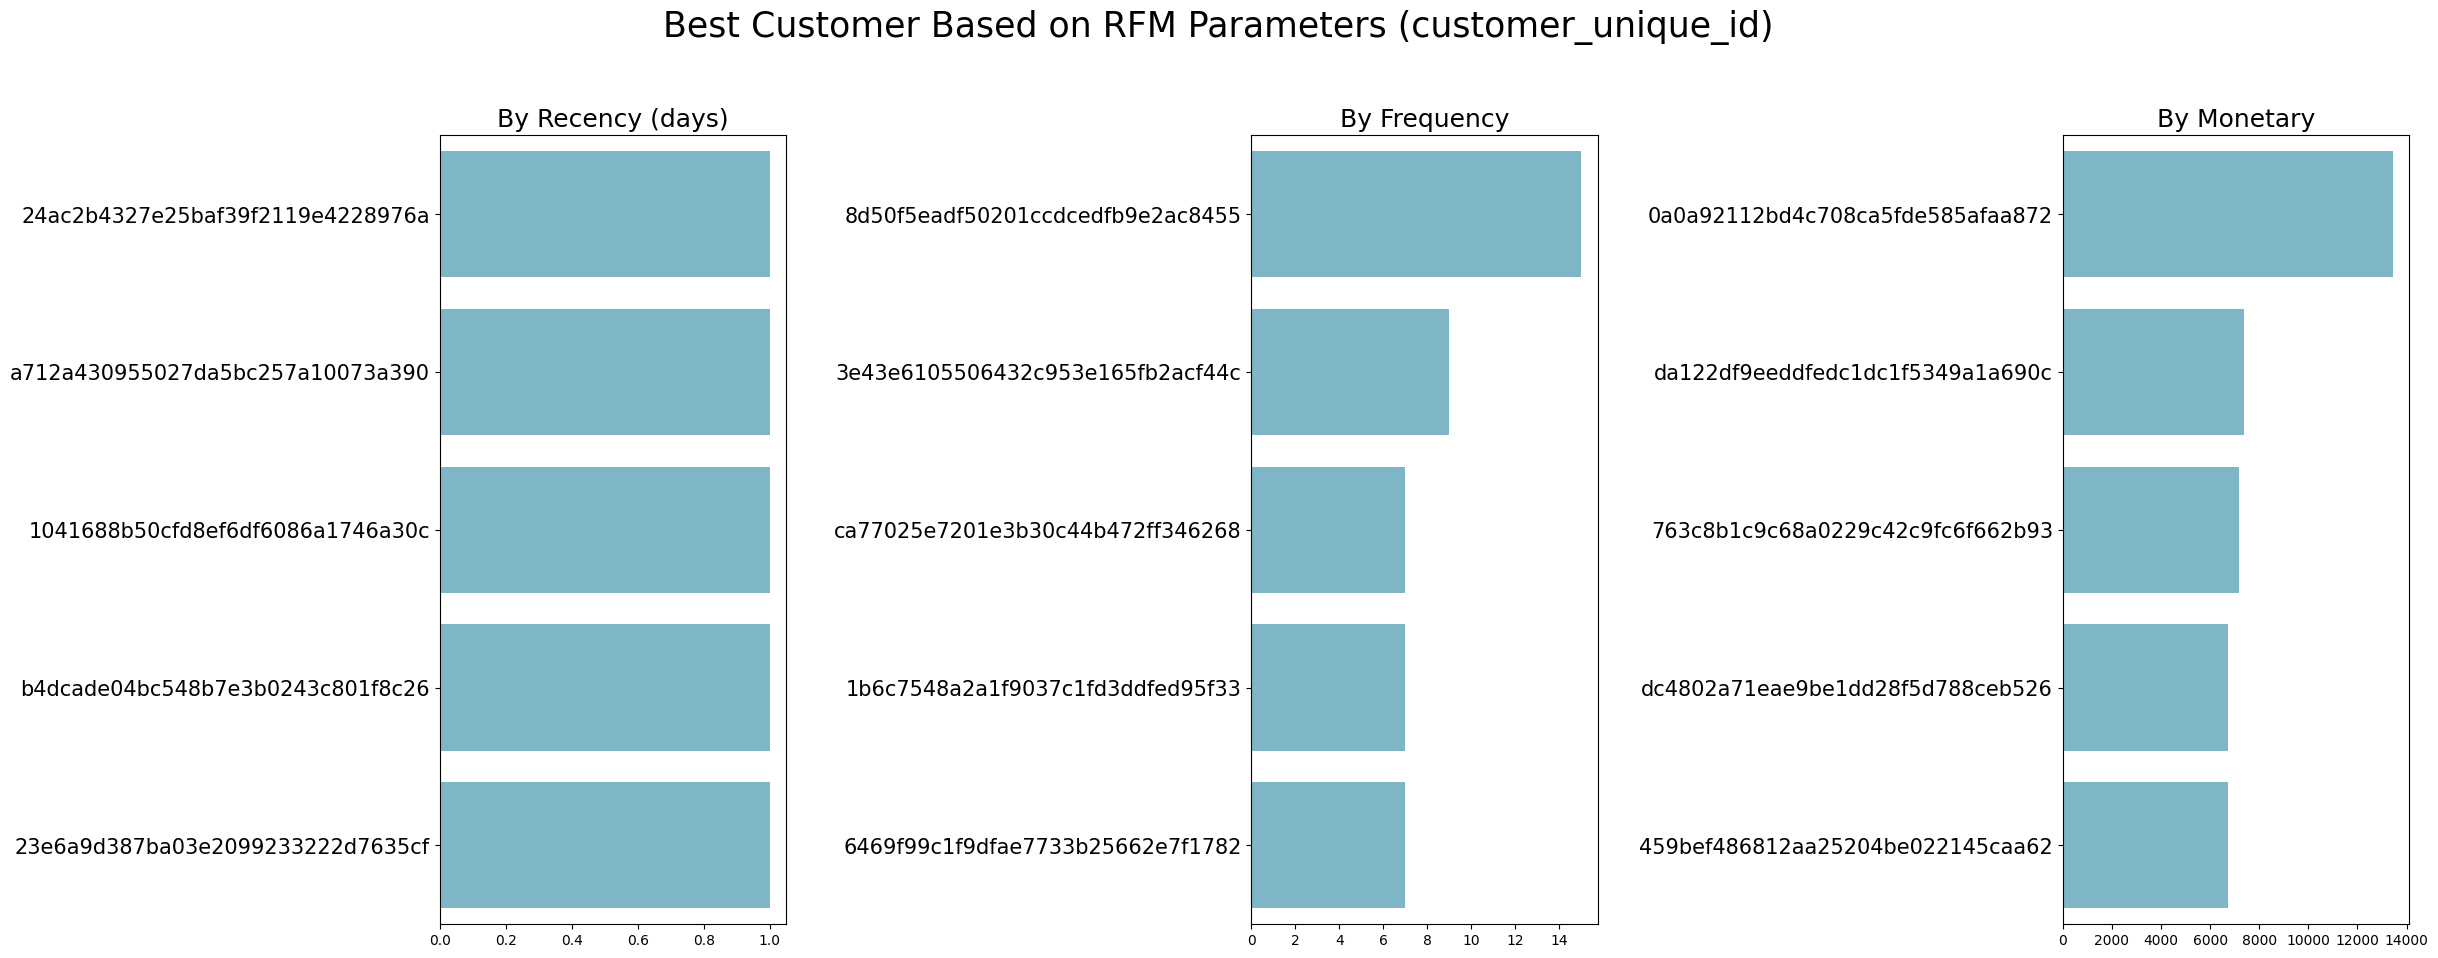

In [294]:
# Membuat frame untuk 3 grafik berdampingan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# 1. Top 5 Customers by Recency (Makin kecil makin bagus)
sns.barplot(
    y="customer_id", 
    x="recency", 
    data=rfm_df.sort_values(by="recency", ascending=True).head(5), 
    palette=colors, 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

# 2. Top 5 Customers by Frequency (Makin besar makin bagus)
sns.barplot(
    y="customer_id", 
    x="frequency", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# 3. Top 5 Customers by Monetary (Makin besar makin bagus)
sns.barplot(
    y="customer_id", 
    x="monetary", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    palette=colors, 
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=25)
plt.tight_layout(pad=3.0)
plt.show()


## Conclusion

- Conclution pertanyaan 1: Tren jumlah order per bulan dari `2016-09` cenderung meningkat sampai puncaknya pada `2017-11` dengan penjualan sekitar `7000` jumlah order namun dibulan berikutnya `2017-12` kembali menurun sekitar `5500` penjualan lalu `2018-01` sampai `2018-08` penjualan berada di sekitar `6000 - 7000` order setiap bulan.
 
  Saran/rekomendasi untuk Olist adalah untuk menaikkan stok produk di Q4 untuk meningkatkan jumlah order di Q4.
- Conclution pertanyaan 2: Produk `bed bath table, health beauty, sports leisure, furniture decor, computer accessories` Menjadi produk yang paling laris di Toko Olist. 
Saran untuk toko Olist pastikan agar 5 kategori produk ini dipertahankan kualitasnya dan juga stok barang ditingkatkan karna dari hasil analisis sebelumnya juga kelima kategori produk ini masuk daftar 10 kategori produk yang menyumbangkan revenue terbanyak.

  Untuk Kategori `produk security and services, fashion children clothes, cds dvds musical, la cuisine, arts and craftmanship` menjadi 5 produk yang kurang diminati oleh customer.
  Saran untuk toko olist agar memberikan diskon untuk 5 produk ini atau memberikan bundling untuk 5 produk ini agar dapat meningkatkan volume pembelian.

**PREPARE DATA FOR DASHBOARD STREAMLIT**


In [295]:
# Save table-table yang akan digunakan untuk pembuatan dashboard streamlit
product_order_items_orders.to_csv('product_order_items_orders.csv', index =False)
orders.to_csv('orders.csv', index = False)
order_payment.to_csv('order_payment.csv', index=False)
